In [50]:
import os

from PIL import Image, ImageDraw

from yolov5.predict import run

In [51]:
%%time
bboxes = run(weights="weights/trash.pt", source="test_trash", imgsz=(1080, 1080))

YOLOv5  3e20cbe torch 1.10.0+cu113 CUDA:0 (Quadro RTX 6000, 24576MiB)

Fusing layers... 
Model Summary: 367 layers, 46113663 parameters, 0 gradients, 107.8 GFLOPs


Wall time: 1.13 s


In [52]:
imgs = []
for f in os.listdir("test_trash"):
    img = Image.open(os.path.join("test_trash", f))
    imgs.append(img)

for img, boxes in zip(imgs, bboxes):
    draw = ImageDraw.Draw(img)
    img_w, img_h = img.size
    for box in boxes:
        cls = box["class"]
        center_xy = box["center"]
        size = box["size"]
        lx = (center_xy[0]-size[0]/2)*img_w - 10
        rx = (center_xy[0]+size[0]/2)*img_w + 10
        ly = (center_xy[1]-size[1]/2)*img_h - 10
        ry = (center_xy[1]+size[1]/2)*img_h + 10
        color = "red" if cls == 1 else "green"
        draw.rectangle([lx, ly, rx, ry], outline=color, width=3)

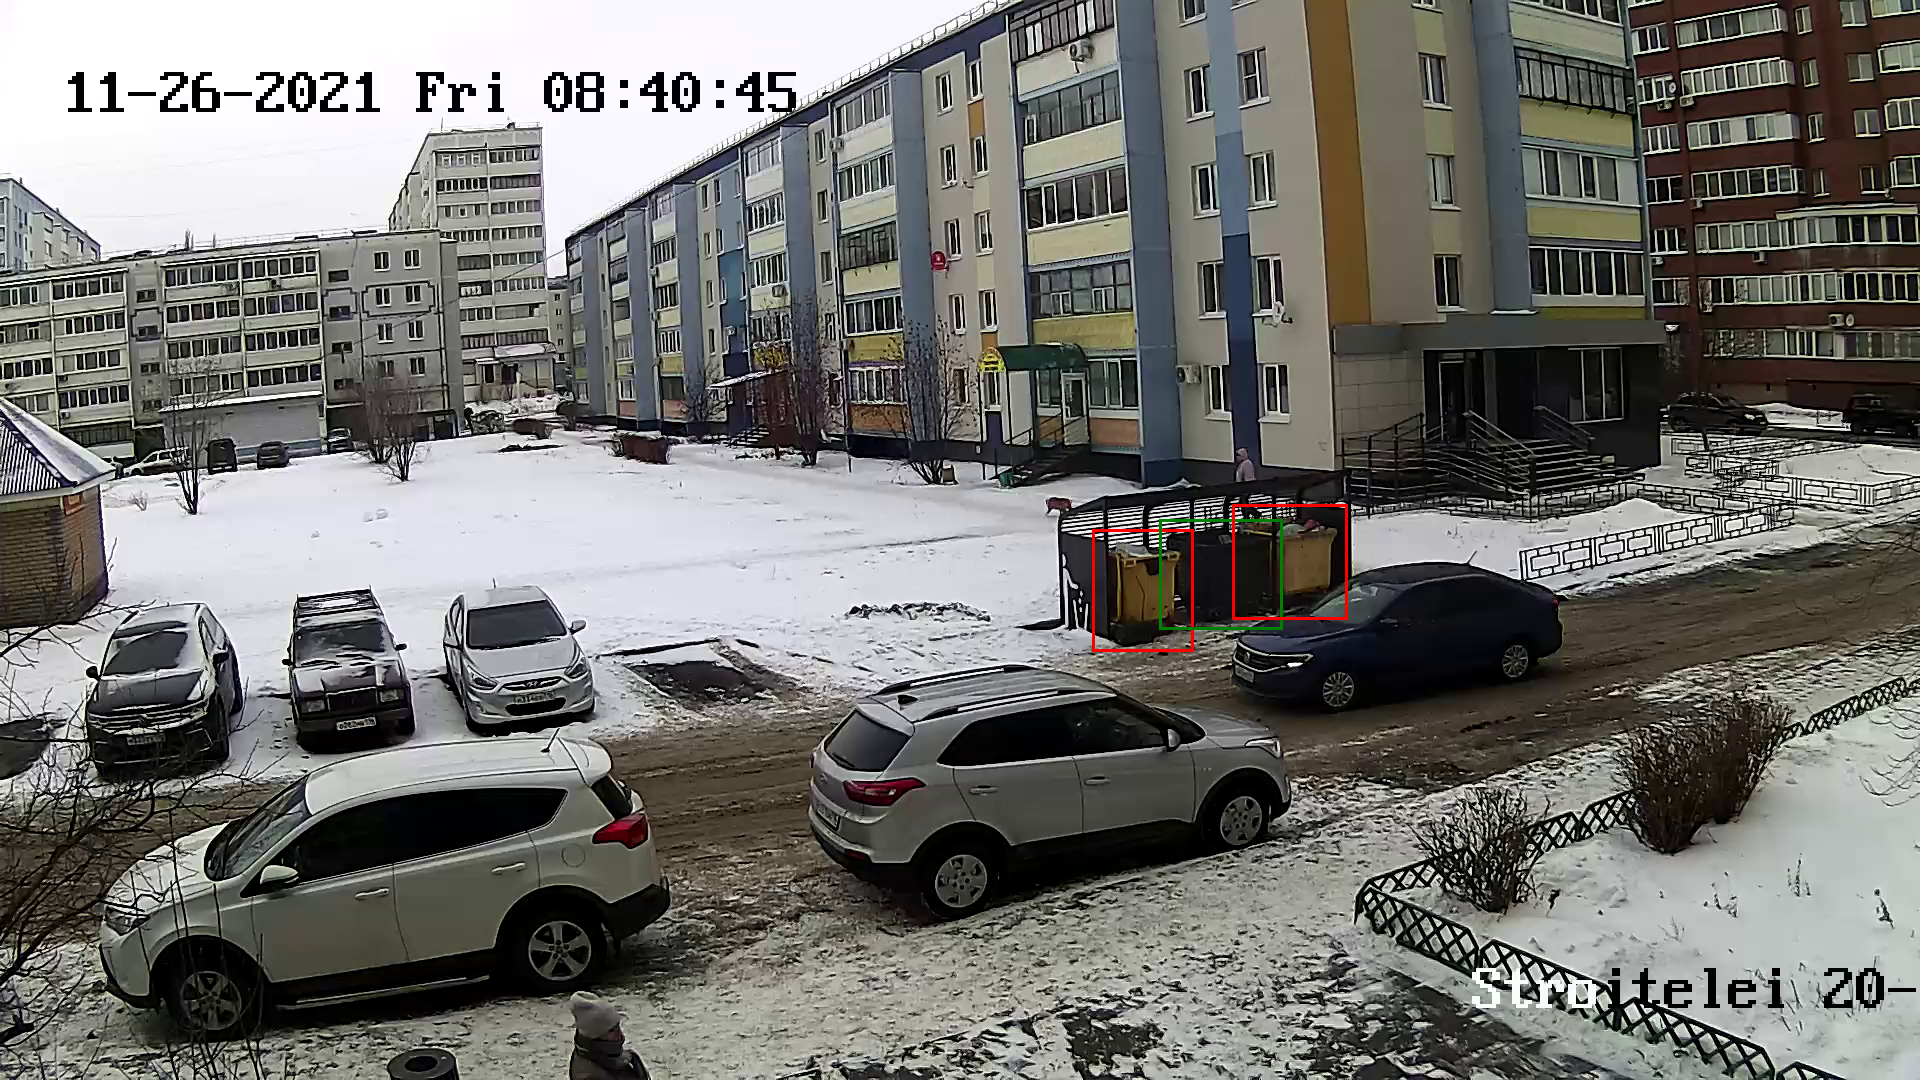

In [54]:
imgs[2]